In [2]:
import numpy as np
from numpy import *
from cvxopt import matrix, spmatrix, umfpack, mul, sqrt, div
from scipy.stats.stats import pearsonr
# Map plotting
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from mpl_toolkits.basemap import Basemap,shiftgrid
from matplotlib.ticker import MaxNLocator

In [3]:
# Streamfunction Inversion Function
def invY(Wr,h):
    # Coordinates
    Theta,Phi = linspace(h,pi-h,179),linspace(0,2*pi,361)
    N,M       = len(Theta),len(Phi)
    Ph,Th     = np.meshgrid(Phi, Theta)       # Ph,Th Lon-Lat Grid [N,M]
    # Sin,Cos,Tan
    sth,cth,tth = sin(Th),cos(Th),tan(Th)
    # Equation factors
    a = (-2/h**2)*(1+(sth)**-2)
    b = ( 1/h**2)+(2*h*tth)**-1
    c = ( 1/h**2)-(2*h*tth)**-1
    d = ( 1/h**2)*(sth)**-2
    b[N-1],c[0] = 0,0
    av = matrix(a,(1,N*M))
    bv = matrix(b,(1,N*M))
    cv = matrix(c,(1,N*M))
    dv = matrix(d,(1,N*M))
    # A Matrix
    MD = spmatrix(av,            range(N*M),       range(N*M)                    )
    B  = spmatrix(bv[0:N*M-1],   range(N*M-1),     range(1,N*M),        (N*M,N*M))
    C  = spmatrix(cv[1:N*M],     range(1,N*M),     range(N*M-1),        (N*M,N*M))
    DU = spmatrix(dv[0:N*M-(N)], range(N*M-N),     range(N,N*M),        (N*M,N*M))
    EU = spmatrix(dv[0:N],       range(N),         range(N*M-2*N,N*M-N),(N*M,N*M))
    ED = spmatrix(dv[N:N*M],     range(N,N*M),     range(N*M-N),        (N*M,N*M))
    DD = spmatrix(dv[N*M-N:N*M], range(N*M-N,N*M), range(N,2*N),        (N*M,N*M))
    A = MD+B+C+DU+DD+EU+ED
    # Inversion
    R = 3485e+0 
    V = matrix(((-R**2)*Wr),(N*M,1))
    umfpack.linsolve(A,V)
    Y = matrix(V,(N,M))
    return Y;

# Streamfunction Inversion Function
def invY2(Wr,h):
    # Coordinates
    Theta,Phi = linspace(h,pi-h,179),linspace(0,2*pi,361)
    N,M       = len(Theta),len(Phi)
    Ph,Th     = np.meshgrid(Phi, Theta)       # Ph,Th Lon-Lat Grid [N,M]
    # Sin,Cos,Tan
    sth,cth,tth = sin(Th),cos(Th),tan(Th)
    # Equation factors
    a = (-2/h**2)*(1+(sth)**-2)
    b = ( 1/h**2)+(2*h*tth)**-1
    c = ( 1/h**2)-(2*h*tth)**-1
    d = ( 1/h**2)*(sth)**-2
    P = ( 2/h**2)
    #b[N-1],c[0] = 0,0
    b[0],b[N-1] = P,0
    c[0],c[N-1] = 0,P
    av = matrix(a,(1,N*M))
    bv = matrix(b,(1,N*M))
    cv = matrix(c,(1,N*M))
    dv = matrix(d,(1,N*M))
    # A Matrix
    MD = spmatrix(av,            range(N*M),       range(N*M)                    )
    B  = spmatrix(bv[0:N*M-1],   range(N*M-1),     range(1,N*M),        (N*M,N*M))
    C  = spmatrix(cv[1:N*M],     range(1,N*M),     range(N*M-1),        (N*M,N*M))
    DU = spmatrix(dv[0:N*M-(N)], range(N*M-N),     range(N,N*M),        (N*M,N*M))
    EU = spmatrix(dv[0:N],       range(N),         range(N*M-2*N,N*M-N),(N*M,N*M))
    ED = spmatrix(dv[N:N*M],     range(N,N*M),     range(N*M-N),        (N*M,N*M))
    DD = spmatrix(dv[N*M-N:N*M], range(N*M-N,N*M), range(N,2*N),        (N*M,N*M))
    A = MD+B+C+DU+DD+EU+ED
    # Inversion
    R = 3485e+0 
    V = matrix(((-R**2)*Wr),(N*M,1))
    umfpack.linsolve(A,V)
    Y = matrix(V,(N,M))
    return Y;

In [4]:
# Radius at the CMB
r = 3485e+0                           # radius in Km

# FMD step
h = deg2rad(1)                      # in radians

# Coordinates
Theta = linspace(h, pi-h, 179)        # Co-latitude from 0.5° to 179.5°
Phi = linspace(0, 2*pi, 361)        # Longitude   from 0.5° to 360.5°
N,M = len(Theta),len(Phi)
Ph,Th = np.meshgrid(Phi, Theta)       # Ph,Th Lon-Lat Grid [181,361]

# Sin & Cos
sth = matrix(sin(Th))
sph = matrix(sin(Ph))
cth = matrix(cos(Th))
c2th = matrix(cos(2*Th))
cph = matrix(cos(Ph))

0.234064651944
(0.9850193629818641, 0.0)


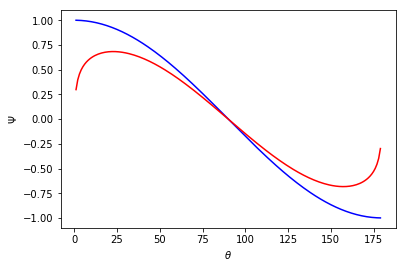

0.000322385109857
(0.9999999818826185, 0.0)


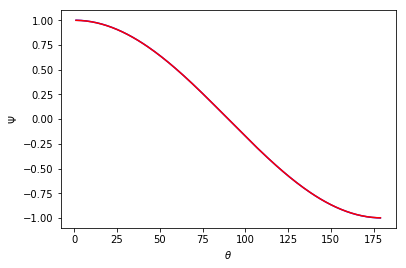

In [5]:
Tor1    = cth
wr1     = (2/r**2)*cth

# without polar correction
Tft1    = invY(wr1,h)
#const   = sum(mul(Tft1,sth))/sum(sth)
#Tft1    = Tft1-const
misfit1 = Tor1-Tft1

mf1 = sqrt(sum(mul(misfit1**2,sth))/sum(mul(Tor1**2,sth)))
print mf1

corr1 = pearsonr(array(Tor1).ravel(),array(Tft1).ravel())
print corr1

D1 = Tor1[:,20]
D2 = Tft1[:,20]
fig, ax = plt.subplots()
xplot = rad2deg(Theta)
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

# with polar correction
Tft1_2    = invY2(wr1,h)
const_2   = sum(mul(Tft1_2,sth))/sum(sth)
Tft1_2    = Tft1_2-const_2
misfit1_2 = Tor1-Tft1_2

mf1_2 = sqrt(sum(mul(misfit1_2**2,sth))/sum(mul(Tor1**2,sth)))
print mf1_2

corr1_2 = pearsonr(array(Tor1).ravel(),array(Tft1_2).ravel())
print corr1_2

D1 = Tor1[:,20]
D2 = Tft1_2[:,20]
fig, ax = plt.subplots()
xplot = rad2deg(Theta)
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

1.91554112252e-05
(0.9999999999956579, 0.0)


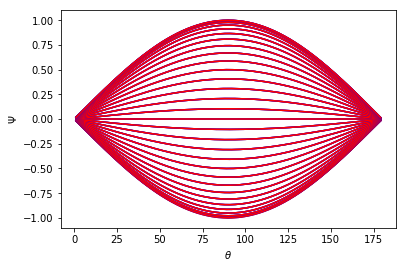

0.0101068255939
(0.9999984686035384, 0.0)


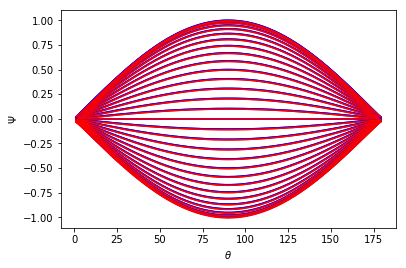

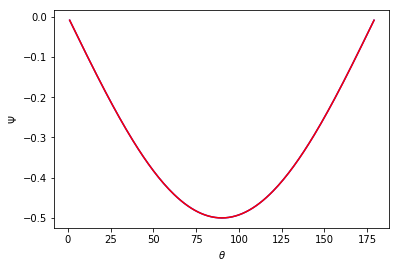

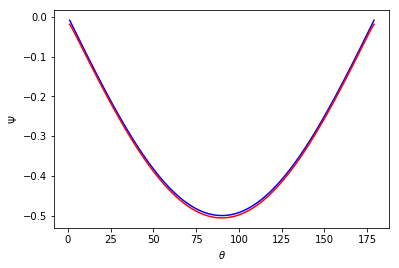

In [6]:
Tor2    = mul(sth,cph)
wr2     = (2/r**2)*mul(sth,cph)
Tft2    = invY(wr2,h)
misfit2 = Tor2-Tft2

mf2 = sqrt(sum(mul(misfit2**2,sth))/sum(mul(Tor2**2,sth)))
print mf2

corr2 = pearsonr(array(Tor2).ravel(),array(Tft2).ravel())
print corr2

fig, ax = plt.subplots()
xplot = rad2deg(Theta)
for i in xrange(61):
    D1 = Tor2[:,i*6]
    D2 = Tft2[:,i*6]
    ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

# with polar correction
Tft2_2    = invY2(wr2,h)
misfit2_2 = Tor2-Tft2_2

mf2_2 = sqrt(sum(mul(misfit2_2**2,sth))/sum(mul(Tor2**2,sth)))
print mf2_2

corr2_2 = pearsonr(array(Tor2).ravel(),array(Tft2_2).ravel())
print corr2_2

fig, ax = plt.subplots()
xplot = rad2deg(Theta)
for i in xrange(61):
    D1 = Tor2[:,i*6]
    D2 = Tft2_2[:,i*6]
    ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

fig, ax = plt.subplots()
xplot = rad2deg(Theta)
D1 = Tor2[:,120]
D2 = Tft2[:,120]
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

fig, ax = plt.subplots()
xplot = rad2deg(Theta)
D1 = Tor2[:,120]
D2 = Tft2_2[:,120]
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

0.0444886229041
(0.9993140941179842, 0.0)


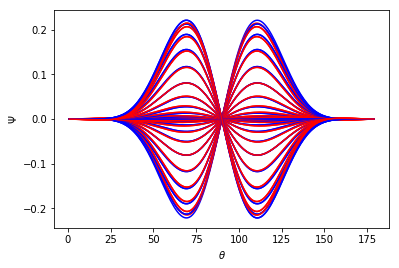

0.0527898250324
(0.999313864728197, 0.0)


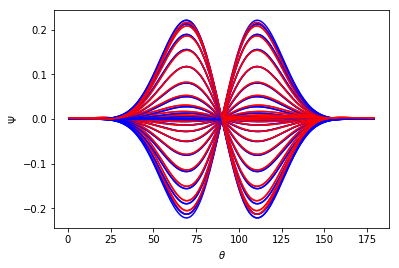

In [7]:
Tor3    = mul(sth**7,mul(cth,cph**7))
wr3     = (1/r**2)*(-49*mul(cth**3,mul(sth**5,cph**7))+23*mul(cth,mul(sth**7,cph**7))+7*mul(cth,mul(sth**6,cph**7))
                 -42*mul(mul(cth,sth**6),mul(cph**5,sph**2)))
#wr3     = (72/r**2)*Tor3

Tft3    = invY(wr3,h)
misfit3 = Tor3-Tft3

mf3 = sqrt(sum(mul(misfit3**2,sth))/sum(mul(Tor3**2,sth)))
print mf3

corr3 = pearsonr(array(Tor3).ravel(),array(Tft3).ravel())
print corr3


fig, ax = plt.subplots()
xplot = rad2deg(Theta)
for i in xrange(61):
    D1 = Tor3[:,i*6]
    D2 = Tft3[:,i*6]
    ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

Tft3_2    = invY2(wr3,h)
misfit3_2 = Tor3-Tft3_2

mf3_2 = sqrt(sum(mul(misfit3_2**2,sth))/sum(mul(Tor3**2,sth)))
print mf3_2

corr3_2 = pearsonr(array(Tor3).ravel(),array(Tft3_2).ravel())
print corr3_2


fig, ax = plt.subplots()
xplot = rad2deg(Theta)
for i in xrange(61):
    D1 = Tor3[:,i*6]
    D2 = Tft3_2[:,i*6]
    ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

2.2351889671
(0.9999999959773481, 0.0)


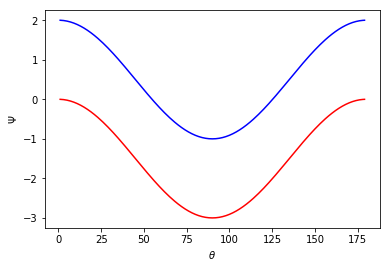

4609625248.33
(0.9999911034437394, 0.0)


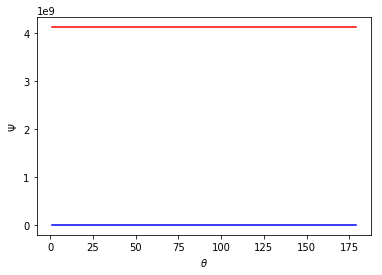

In [26]:
Tor4    = 3*cth**2-1
wr4     = (6/r**2)*(2*cth**2-sth**2)

Tft4    = invY(wr4,h)
#const   = sum(mul(Tft4,sth))/sum(sth)
#Tft4    = Tft4-const
misfit4 = Tor4-Tft4

mf4 = sqrt(sum(mul(misfit4**2,sth))/sum(mul(Tor4**2,sth)))
print mf4

corr4 = pearsonr(array(Tor4).ravel(),array(Tft4).ravel())
print corr4

D1 = Tor4[:,300]
D2 = Tft4[:,300]
fig, ax = plt.subplots()
xplot = rad2deg(Theta)
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

Tft4_2    = invY2(wr4,h)
#const   = sum(mul(Tft4_2,sth))/sum(sth)
#Tft4_2    = Tft4_2-const
misfit4_2 = Tor4-Tft4_2

mf4_2 = sqrt(sum(mul(misfit4_2**2,sth))/sum(mul(Tor4**2,sth)))
print mf4_2

corr4_2 = pearsonr(array(Tor4).ravel(),array(Tft4_2).ravel())
print corr4_2

D1 = Tor4[:,300]
D2 = Tft4_2[:,300]
fig, ax = plt.subplots()
xplot = rad2deg(Theta)
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

6.39547573017e-05
(0.999999999690583, 0.0)


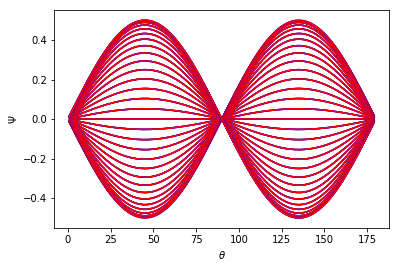

0.0410321247327
(0.999994032281858, 0.0)


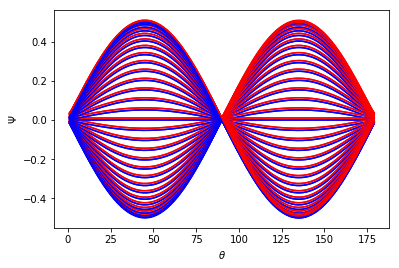

In [9]:
Tor5    = mul(sth,mul(cth,cph))
wr5     = (6/r**2)*(mul(sth,mul(cth,cph)))

Tft5    = invY(wr5,h)
misfit5 = Tor5-Tft5

mf5 = sqrt(sum(mul(misfit5**2,sth))/sum(mul(Tor5**2,sth)))
print mf5

corr5 = pearsonr(array(Tor5).ravel(),array(Tft5).ravel())
print corr5

fig, ax = plt.subplots()
xplot = rad2deg(Theta)
for i in xrange(61):
    D1 = Tor5[:,i*6]
    D2 = Tft5[:,i*6]
    ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

Tft5_2    = invY2(wr5,h)
misfit5_2 = Tor5-Tft5_2

mf5_2 = sqrt(sum(mul(misfit5_2**2,sth))/sum(mul(Tor5**2,sth)))
print mf5_2

corr5_2 = pearsonr(array(Tor5).ravel(),array(Tft5_2).ravel())
print corr5_2

fig, ax = plt.subplots()
xplot = rad2deg(Theta)
for i in xrange(61):
    D1 = Tor5[:,i*6]
    D2 = Tft5_2[:,i*6]
    ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

0.357380886281
(0.9151930582305057, 0.0)


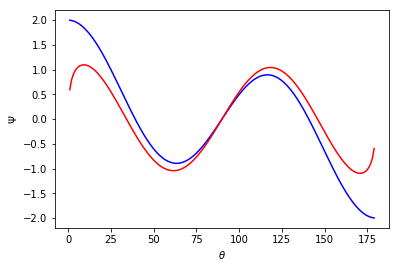

0.00288926512216
(0.9999967816154398, 0.0)


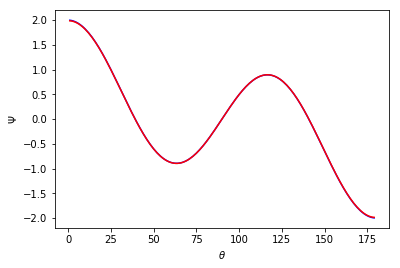

In [10]:
Tor6    = 5*cth**3-3*cth
wr6     = (12/r**2)*(5*cth**3-3*cth)

Tft6    = invY(wr6,h)
misfit6 = Tor6-Tft6

mf6 = sqrt(sum(mul(misfit6**2,sth))/sum(mul(Tor6**2,sth)))
print mf6

corr6 = pearsonr(array(Tor6).ravel(),array(Tft6).ravel())
print corr6

D1 = Tor6[:,20]
D2 = Tft6[:,20]
fig, ax = plt.subplots()
xplot = rad2deg(Theta)
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

Tft6_2    = invY2(wr6,h)

const   = sum(mul(Tft6_2,sth))/sum(sth)
Tft6_2    = Tft6_2-const

misfit6_2 = Tor6-Tft6_2

mf6_2 = sqrt(sum(mul(misfit6_2**2,sth))/sum(mul(Tor6**2,sth)))
print mf6_2

corr6_2 = pearsonr(array(Tor6).ravel(),array(Tft6_2).ravel())
print corr6_2

D1 = Tor6[:,20]
D2 = Tft6_2[:,20]
fig, ax = plt.subplots()
xplot = rad2deg(Theta)
ax.plot(xplot, D1,'blue', xplot, D2,'red')
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\Psi$')
plt.show()

In [11]:
# Map plotting
from numpy import ma
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from mpl_toolkits.basemap import Basemap,shiftgrid
from matplotlib.ticker import MaxNLocator

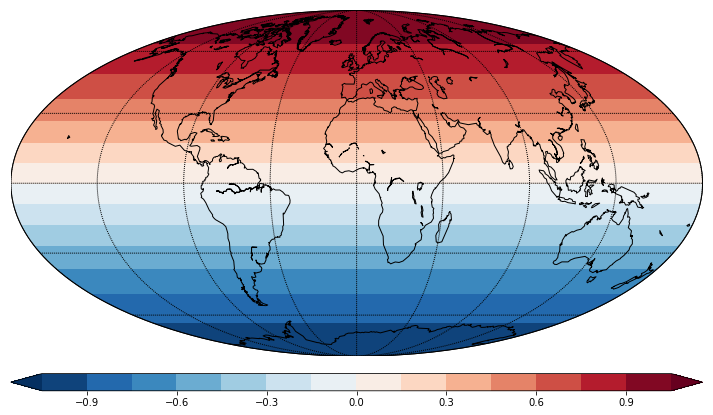

In [29]:
data1   = Tor1
levels = MaxNLocator(nbins=15).tick_values( -max(abs(data1)), max(abs(data1)))

location = 'bottom'
# Map Coordinates
                                                                                                                                                                                                                     
lon  = Phi*180/pi
lat  = (pi/2-Theta)*180/pi                                                                                                                                                                                                                      
lons,lats = np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(14, 7))

m      = Basemap(projection='moll',lon_0=0,resolution='c')
cs     = m.contourf(lons,lats,data1,levels,cmap=plt.cm.RdBu_r,extend='both',latlon=True)
cbar   = m.colorbar(cs,location=location,pad="5%")
#cbar.set_label('mT/yr',size=10)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90,30.),latmax=90)

m.drawmeridians(np.arange(0.,360.,45.),latmax=90)
#plt.title(r'$\partial B_r/\partial t$ modeled',size=12)
plt.savefig('../Figures/Stream-test_1.png')

plt.show()

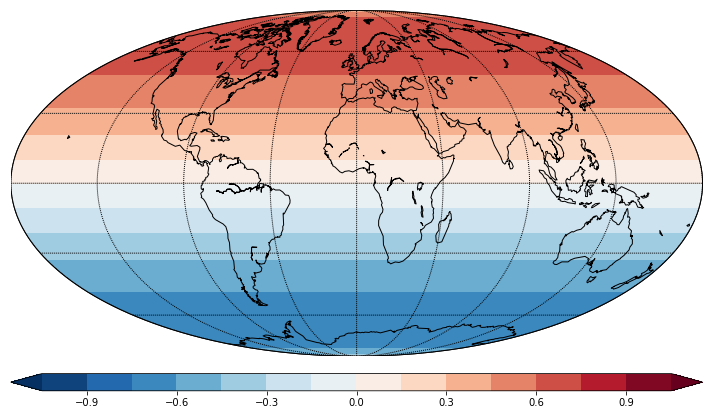

In [30]:
data   = Tft1
levels = MaxNLocator(nbins=15).tick_values( -max(abs(data1)), max(abs(data1)))
#levels = MaxNLocator(nbins=15).tick_values( -24, 24)
#levels = MaxNLocator(nbins=15).tick_values( -1, 1)

location = 'bottom'
# Map Coordinates
                                                                                                                                                                                                                     
lon  = Phi*180/pi
lat  = (pi/2-Theta)*180/pi                                                                                                                                                                                                                      
lons,lats = np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(14, 7))

m      = Basemap(projection='moll',lon_0=0,resolution='c')
cs     = m.contourf(lons,lats,data,levels,cmap=plt.cm.RdBu_r,extend='both',latlon=True)
cbar   = m.colorbar(cs,location=location,pad="5%")
#cbar.set_label('mT/yr',size=10)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90,30.),latmax=90)

m.drawmeridians(np.arange(0.,360.,45.),latmax=90)
plt.savefig('../Figures/Stream-test_2.png')

plt.show()

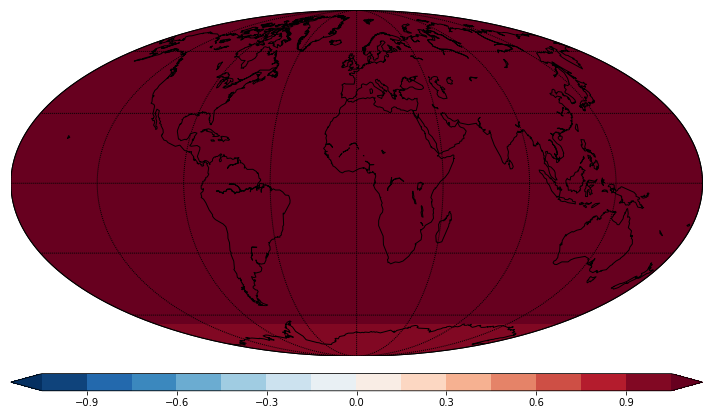

In [31]:
data   = Tft1_2
levels = MaxNLocator(nbins=15).tick_values( -max(abs(data1)), max(abs(data1)))
#levels = MaxNLocator(nbins=15).tick_values( -24, 24)
#levels = MaxNLocator(nbins=15).tick_values( -1, 1)

location = 'bottom'
# Map Coordinates
                                                                                                                                                                                                                     
lon  = Phi*180/pi
lat  = (pi/2-Theta)*180/pi                                                                                                                                                                                                                      
lons,lats = np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(14, 7))

m      = Basemap(projection='moll',lon_0=0,resolution='c')
cs     = m.contourf(lons,lats,data,levels,cmap=plt.cm.RdBu_r,extend='both',latlon=True)
cbar   = m.colorbar(cs,location=location,pad="5%")
#cbar.set_label('mT/yr',size=10)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90,30.),latmax=90)

m.drawmeridians(np.arange(0.,360.,45.),latmax=90)
plt.savefig('../Figures/Stream-test_2.png')

plt.show()

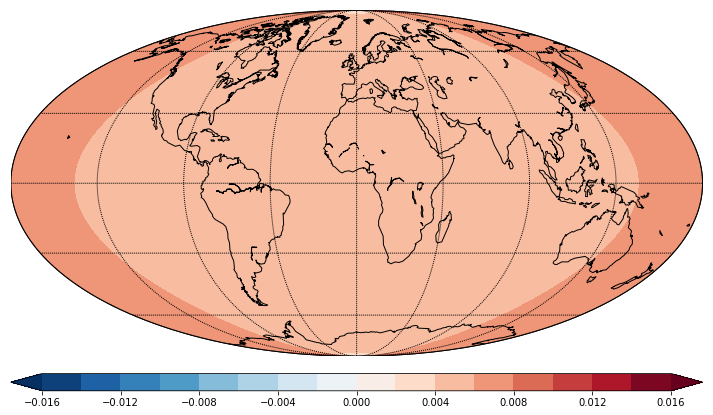

In [22]:
data   = misfit2_2
levels = MaxNLocator(nbins=15).tick_values( -max(abs(data)), max(abs(data)))
#levels = MaxNLocator(nbins=15).tick_values( -1, 1)

location = 'bottom'
# Map Coordinates
                                                                                                                                                                                                                     
lon  = Phi*180/pi
lat  = (pi/2-Theta)*180/pi                                                                                                                                                                                                                      
lons,lats = np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(14, 7))

m      = Basemap(projection='moll',lon_0=0,resolution='c')
cs     = m.contourf(lons,lats,data,levels,cmap=plt.cm.RdBu_r,extend='both',latlon=True)
cbar   = m.colorbar(cs,location=location,pad="5%")
#cbar.set_label('mT/yr',size=10)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90,30.),latmax=90)

m.drawmeridians(np.arange(0.,360.,45.),latmax=90)
#plt.title(r'$\partial B_r/\partial t$ modeled',size=12)
#plt.savefig('../Figures/SV_C%d.png' % (C))

plt.show()

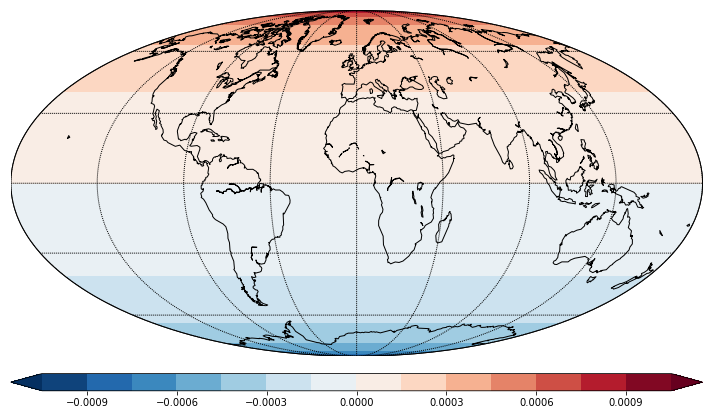

In [26]:
data   = misfit1_2
levels = MaxNLocator(nbins=15).tick_values( -max(abs(data)), max(abs(data)))
#levels = MaxNLocator(nbins=15).tick_values( -1, 1)

location = 'bottom'
# Map Coordinates
                                                                                                                                                                                                                     
lon  = Phi*180/pi
lat  = (pi/2-Theta)*180/pi                                                                                                                                                                                                                      
lons,lats = np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(14, 7))

m      = Basemap(projection='moll',lon_0=0,resolution='c')
cs     = m.contourf(lons,lats,data,levels,cmap=plt.cm.RdBu_r,extend='both',latlon=True)
cbar   = m.colorbar(cs,location=location,pad="5%")
#cbar.set_label('mT/yr',size=10)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90,30.),latmax=90)

m.drawmeridians(np.arange(0.,360.,45.),latmax=90)
#plt.title(r'$\partial B_r/\partial t$ modeled',size=12)
#plt.savefig('../Figures/SV_C%d.png' % (C))

plt.show()

In [ ]:
mf = np.zeros(101)
for A in xrange(101):
    Tor1 = cth+A*mul(sth**7,mul(cth,cph**7))
    wr   = (1/r**2)*(-49*A*mul(cth**3,mul(sth**5,cph**7))+23*A*mul(cth,mul(sth**7,cph**7))+7*A*mul(cth,mul(sth**6,cph**7))
                 -42*A*mul(mul(cth,sth**6),mul(cph**5,sph**2))+2*cth)
    Tor2 = invY(wr,h)
    misfit = Tor1-Tor2
    mf[A] = sqrt(sum(mul(misfit**2,sth))/sum(mul(Tor1**2,sth)))

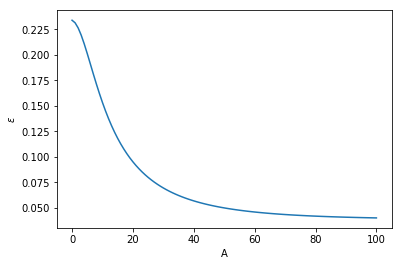

In [22]:
fig, ax = plt.subplots()
xplot = np.arange(101)
yplot = mf
ax.plot(xplot, yplot)
ax.set_xlabel('A')
ax.set_ylabel(r'$\varepsilon$')

plt.show()

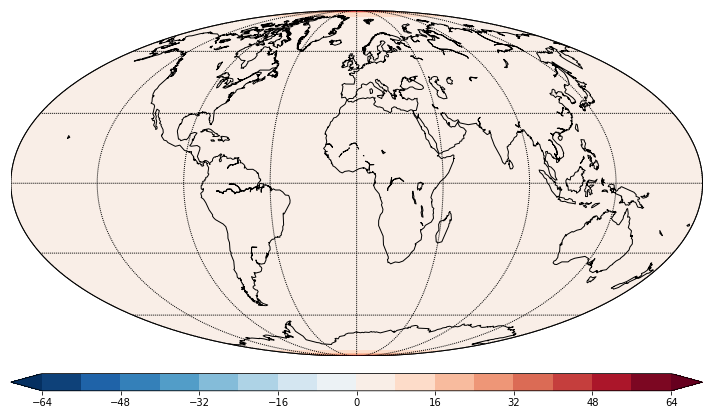

In [15]:
data   = sth**-1
levels = MaxNLocator(nbins=15).tick_values( -max(abs(data)), max(abs(data)))
#levels = MaxNLocator(nbins=15).tick_values( -24, 24)
#levels = MaxNLocator(nbins=15).tick_values( -1, 1)

location = 'bottom'
# Map Coordinates
                                                                                                                                                                                                                     
lon  = Phi*180/pi
lat  = (pi/2-Theta)*180/pi                                                                                                                                                                                                                      
lons,lats = np.meshgrid(lon,lat)

fig, ax = plt.subplots(figsize=(14, 7))

m      = Basemap(projection='moll',lon_0=0,resolution='c')
cs     = m.contourf(lons,lats,data,levels,cmap=plt.cm.RdBu_r,extend='both',latlon=True)
cbar   = m.colorbar(cs,location=location,pad="5%")
#cbar.set_label('mT/yr',size=10)

m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90,30.),latmax=90)

m.drawmeridians(np.arange(0.,360.,45.),latmax=90)
#plt.savefig('../Figures/Stream-test_2.png')

plt.show()